<a href="https://colab.research.google.com/github/RanjithK2608/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#<b> 1) DATA PROCESSING

In [50]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [51]:
# Importing dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data = pd.read_csv('/content/drive/MyDrive/Capstone-01-Hotel Booking Analysis-Ranjith K/Hotel Bookings.csv')

In [53]:
# First 5 rows of the dataset.
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [54]:
# Last 5 rows of the dataset.
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [55]:
## Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [56]:
# Numerical data
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [57]:
# Column name 
list(data.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [58]:
# Column data type
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [59]:
## Looking into shape of data to find out number of rows and columns 
data.shape

(119390, 32)

 # <b> 2) DATA CLEANING

In [60]:
## Let's count how many Null values we have
data.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [61]:
# here 2 columns 'agent' &'company' having huge amount of null values,and are not much needed so we can drop them.
new_data = data.drop(['agent','company'],axis = 1)
new_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [62]:
# Replacing null values of 'country' column with the mode value of the column, So, in this case,replacing it with the country that appears the most often.

new_data['country'].fillna(new_data['country'].mode().to_string(), inplace=True)


In [63]:
# Replacing null values of 'children' column with the mean value of the column.

new_data['children'].fillna(round(new_data['children'].mean()), inplace=True)

In [64]:
# There are many rows that have zero guests including adults, children and babies.

new_data[(new_data.adults+data.babies+data.children)==0].shape

(180, 30)

In [65]:
# Drop Rows where there is no adult, baby and child

new_data = new_data.drop(data[(new_data.adults+new_data.babies+new_data.children)==0].index)

In [66]:
# Data is cleaned,no more null values.
new_data.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#<b> 3) Exploratory Data Analysis

In [67]:
hotel_preferred = new_data['hotel'].value_counts()
hotel_preferred

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

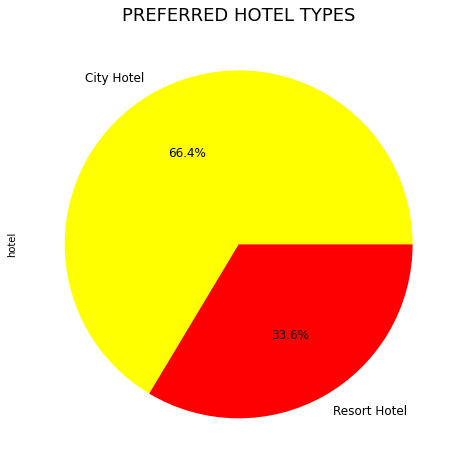

In [68]:
# using data visualisation
hotel_preferred.plot(kind='pie',colors =['yellow','red'],autopct ='%1.1f%%',figsize =(8,8),fontsize= 12)
plt.title('PREFERRED HOTEL TYPES',fontsize = 18)
plt.show()

##<b> What do we see here?


# It seems that a huge proportion of hotels was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel.
# Also, resort hotels tend to be appropriate for larger group of people.

In [69]:
## Let's have an overview of the number of people who booked the hotel.


# Looking into adults. 
# Using groupby to group according to hotel types only.

new_data['adults'].groupby(new_data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79163.0,1.854882,0.502676,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40047.0,1.867755,0.696587,1.0,2.0,2.0,2.0,55.0


In [70]:
# Looking into children. 
# Using groupby to group according to hotel types only.

new_data['children'].groupby(new_data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79163.0,0.091558,0.372537,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40047.0,0.128724,0.445261,0.0,0.0,0.0,0.0,10.0


###<b> It seems that mean values for adults and children are higher. This means that resort hotels are better choice for large families

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


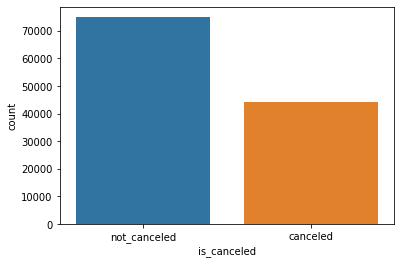

In [71]:
##   Overview of Canceled Bookings

new_data['is_canceled'] = new_data.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = new_data['is_canceled']
sns.countplot(canceled_data)

###<b>  It seems that majority of the bookings were not canceled.

In [79]:
# Cancellation percentage of 'Resort Hotel'.
resort_hotel = new_data[new_data['hotel'] == 'Resort Hotel']
resort_hotel_cancellation = resort_hotel['is_canceled'].value_counts(normalize=True)*100
resort_hotel_cancellation

not_canceled    72.232627
canceled        27.767373
Name: is_canceled, dtype: float64

In [80]:
# Cancellation data of hotels(0 = Not cancelled & 1 = Cancelled)
booking_cancelled = new_data.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
booking_cancelled 

is_canceled,canceled,not_canceled
hotel,,
City Hotel,33079,46084
Resort Hotel,11120,28927


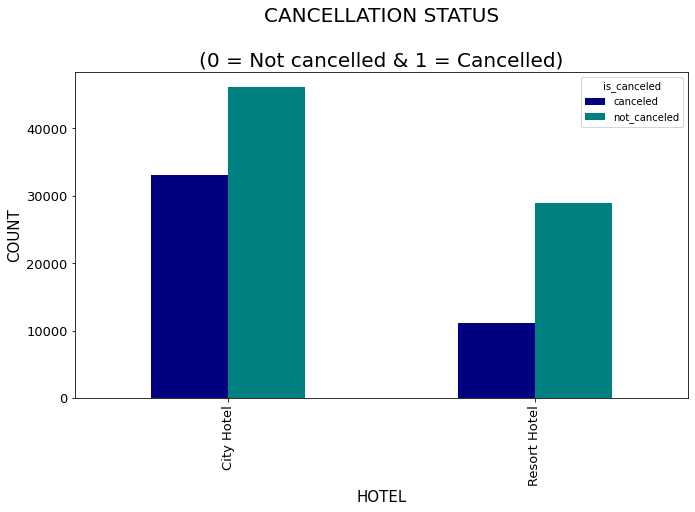

In [85]:
# Visualising cancellation data.
booking_cancelled.plot(kind='bar',figsize=(11,6),color=['Navy','Teal'],fontsize=13)
plt.title('''CANCELLATION STATUS

(0 = Not cancelled & 1 = Cancelled)''',fontsize = 20)
plt.xlabel('HOTEL',fontsize = 15)
plt.ylabel('COUNT',fontsize = 15)
plt.show()

###<b> What do we see here?
# We have seen a huge proportion of cancellation from city hotel. This was expected since 3/4 of the hotel bookings belong to city hotels.

###<b> Overview of Arrival Period

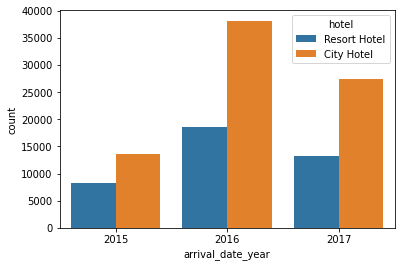

In [86]:
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = data[lst3]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

Text(0, 0.5, 'Count')

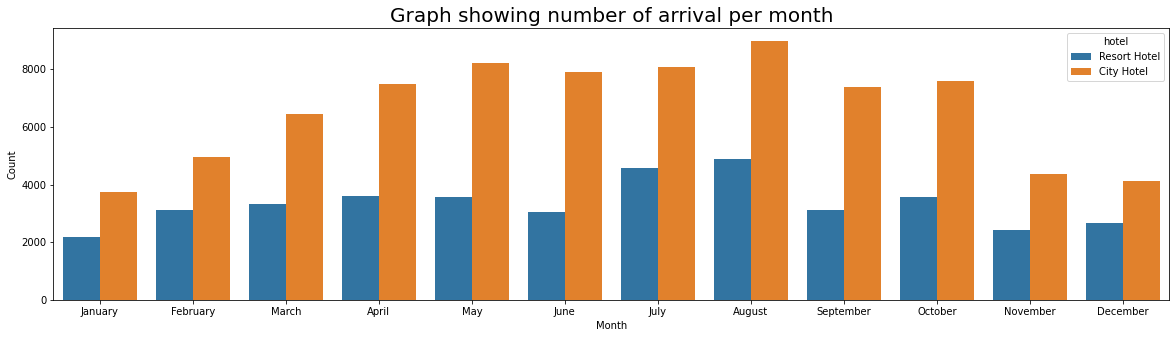

In [87]:
# Number of Arrival per Month

plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

Text(0.5, 1.0, 'Graph showing number of arrival per day')

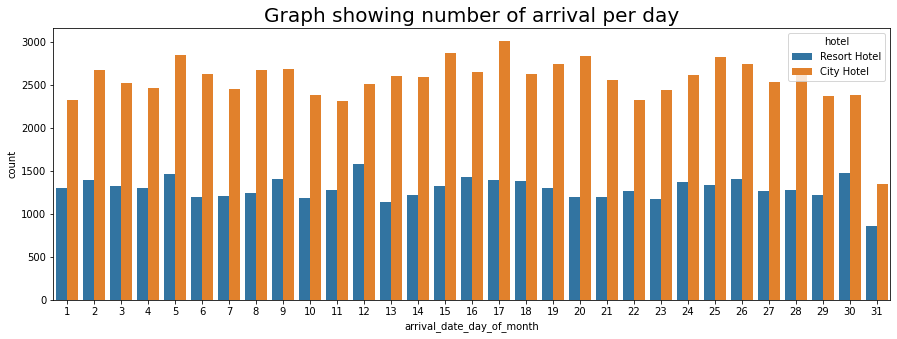

In [28]:
# Number of Arrival per Day


plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrival per day', fontsize = 20)

###<b> So what do we see?
# I can see that 2016 seems to be the year where hotel booking is at its highest. We also see an increasing trend in booking around the middle of the year, with August being the highest. Summer ends around August, followed straight by autumn. It seems that summer period is a peak period for hotel booking.
# We do notice a roller coaster trend for the arrival day of month. Could the peaks belong to a weekend? (i.e Will people tend to book over the weekends?)

In [90]:
#Checking number of night stays for all the bookings
total_night_stays = (new_data['stays_in_week_nights'] + new_data['stays_in_weekend_nights']).value_counts().head(10).sort_index()
total_night_stays

1     21005
2     27632
3     27064
4     17373
5      7771
6      3846
7      8648
8      1155
10     1135
14      913
dtype: int64

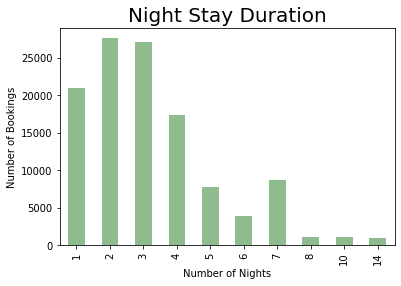

In [91]:
#Graph representing number of bookings vs numnber of night stayed
total_night_stays.plot(kind='bar', color = 'darkseagreen')
plt.title('Night Stay Duration', fontsize = 20)
plt.ylabel('Number of Bookings')
plt.xlabel('Number of Nights')
plt.rcParams['figure.figsize']=(15,10)

###<b> What do we see this time?
# It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random.

Text(0.5, 1.0, 'Number of adults')

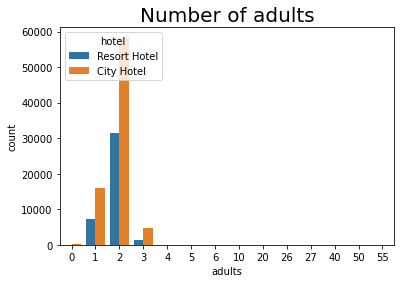

In [32]:
## Type of visitors

sns.countplot(data = data, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

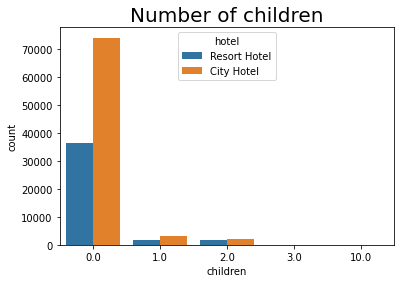

In [33]:
# Number of children

sns.countplot(data = data, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

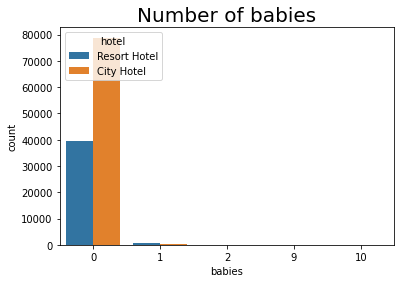

In [34]:
# Number of Babies


sns.countplot(data = data, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

###<b>  What do we see here?
# It seems that majority of the visitors travel in pair. 
# Those that travel with children or babies have no specific preference for the type of hotel.
# We do see that those bringing babies along prefer resort hotels.

In [ ]:
##  Looking into market segments and distribution channel.

In [35]:
# Checking number of bookings made from different source(Market segments)

market_segment_counts = data['market_segment'].value_counts()
market_segment_counts

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

Text(0.5, 1.0, 'Types of market segment')

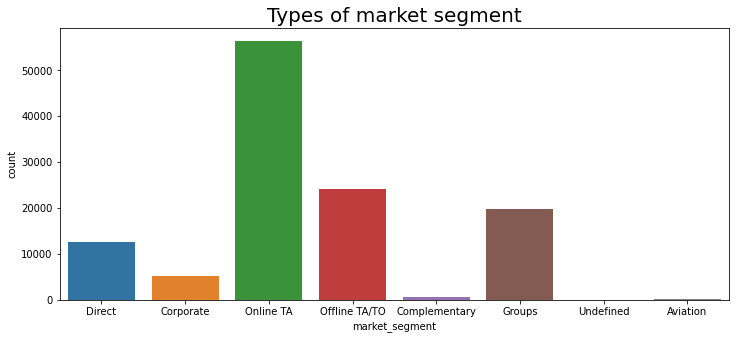

In [36]:
##  Types of Market Segment


plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

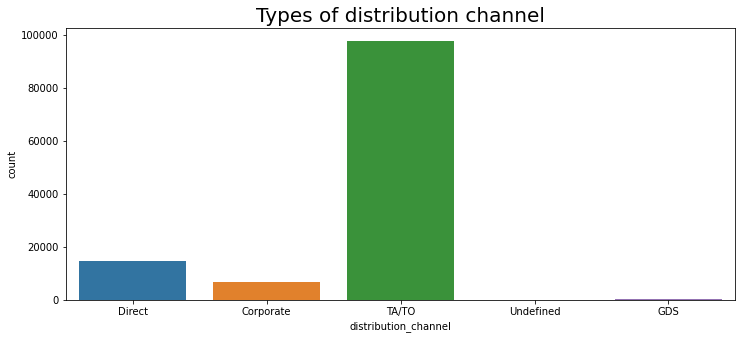

In [37]:
# Types of Distribution channel


plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

In [ ]:
## What do we see here?

# Majority of the distribution channels and market segments involve travel agencies (online or offline).
# We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

Text(0.5, 1.0, 'Graph showing types of deposits')

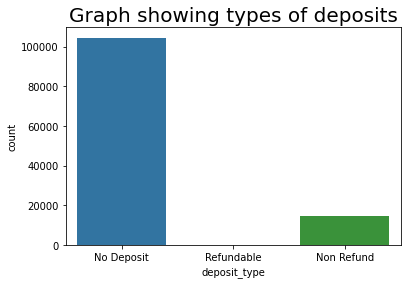

In [38]:
# Looking into deposit types

sns.countplot(data = data, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

In [ ]:
# Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

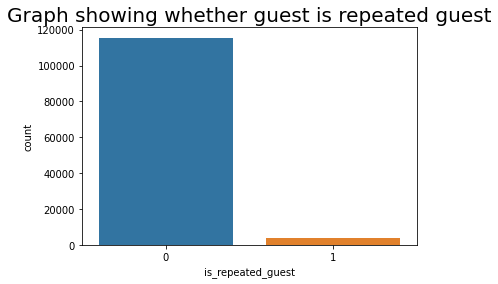

In [39]:
# Overview of repeated guests

sns.countplot(data = data, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

In [ ]:
# What do we see here?
# Low number of repeated guests.
# A need to target repeated guests since they have booked before#

Text(0.5, 1.0, 'Graph showing type of guest')

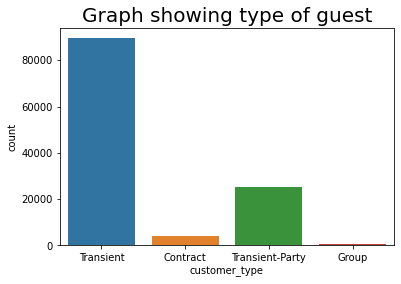

In [40]:
# Looking at types of guests

sns.countplot(data = data, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

In [ ]:
#What do we see here?
#Majority of the bookings are transient. 
#This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking.

In [ ]:
# Looking into prices per month per hotel
# average daily rate =  𝑆𝑢𝑚𝑂𝑓𝐴𝑙𝑙𝐿𝑜𝑑𝑔𝑖𝑛𝑔𝑇𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛𝑇𝑜𝑡𝑎𝑙𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑆𝑡𝑎𝑦𝑖𝑛𝑔𝑁𝑖𝑔ℎ𝑡 
# average daily rate per person =  𝐴𝐷𝑅𝐴𝑑𝑢𝑙𝑡𝑠+𝐶ℎ𝑖𝑙𝑑𝑟𝑒𝑛 
# We will need to find out average daily rate per person

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


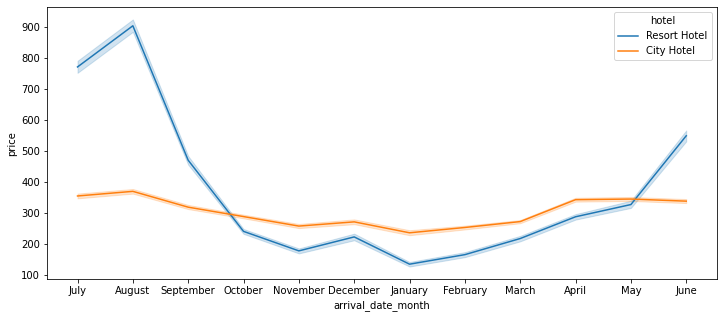

In [41]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']) 
actual_guests = data.loc[data["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

In [96]:
percentage_meal_count = new_data['meal'].value_counts(normalize= True)*100
percentage_meal_count

BB           77.372704
HB           12.128177
SC            8.849090
Undefined     0.980622
FB            0.669407
Name: meal, dtype: float64

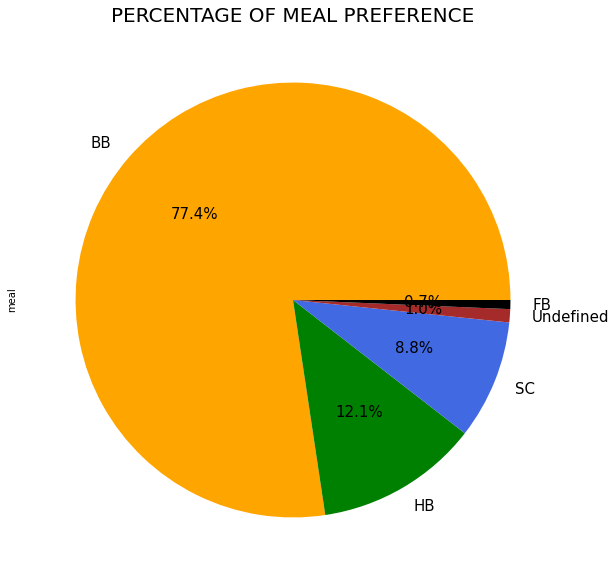

In [101]:
# Visualisation of percentage meal count
percentage_meal_count.plot(kind = 'pie',labels=percentage_meal_count.index,figsize=(10,10),autopct='%0.1f%%',colors=['orange','green','royalblue','brown','black'],fontsize=15)
plt.title('PERCENTAGE OF MEAL PREFERENCE', fontsize=20)
plt.show()

In [94]:
# Car parking requirement count.
car_parking = new_data['required_car_parking_spaces'].value_counts()
car_parking

0    111801
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

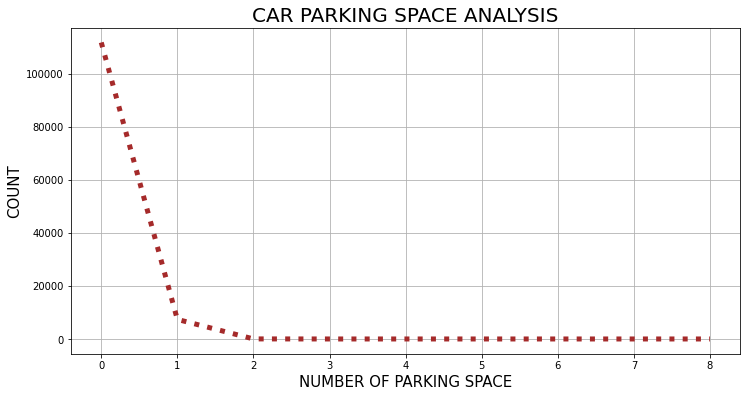

In [95]:
# Visualisation.
car_parking.plot(kind='line',color='brown',linestyle=':',linewidth=5,figsize =(12,6))
plt.title('CAR PARKING SPACE ANALYSIS',fontsize = 20)
plt.ylabel('COUNT',fontsize = 15)
plt.xlabel('NUMBER OF PARKING SPACE',fontsize = 15)
plt.grid(True)
plt.show()

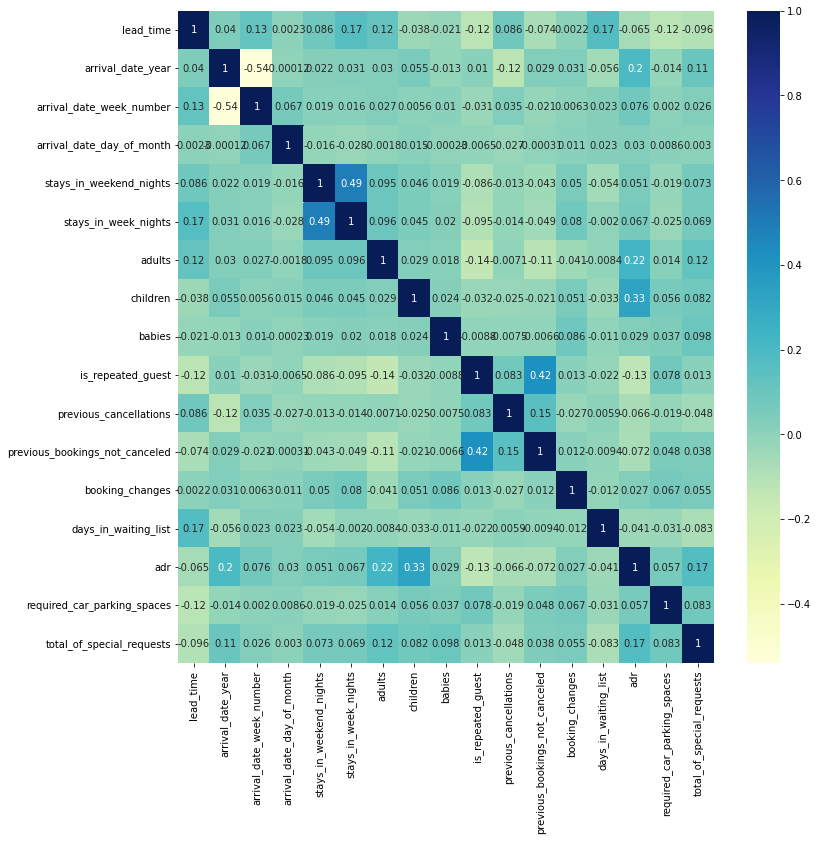

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(new_data.corr(), cmap= 'YlGnBu' ,annot=True);
plt.show()

#<b>CONCLUSION
# 1) Prices of resort hotel are much higher. It seems that that is definitely the case since resort hotels specialise in that.
# 2) Prices of city hotel do not fluctuate that much.
# 3) Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
# 4) We also realise that the high rate of cancellations can be due high no deposit policies.
# 5) We should also target months between May to Aug. Those are peak months due to the summer period.
# 6) Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
# 7) Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests
# 8) After analyzing the meal data, its found that 77.3% of customers prefers BB(Bread & Breakfast).
# 9) Online Travel agencies provides high amount of leads and customers following Offline TA, Groups, Direct, etc., So, we an conclude that we need to focus our marketing area on online TA since majority of the visitors tend to reach out to them.
# 10) Most of the hotels have 0 to 1 car parking space.
